## Building Makemore Multilayer Perceptron

- Based on Research Paper " A Neural Probabilitstic Model"

In [112]:
#importing necessary libraries
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
# read in all words

words=open('names.txt','r').read().splitlines()

In [114]:
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
#build the vocabulary of characters/mappings to/from integers

chars=sorted(list(set(''.join(words))))
stoi= {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos= {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [43]:
#build the dataset

block_size=3 # Context Length: How many characters do we take to predict the next one
X,Y=[],[]

for w in words:
    # print(w)
    
    context=[0]*block_size
    for ch in w + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        
        # print(''.join(itos[i] for i in context),'--->',itos[ix])
        context=context[1:]+[ix] #crop and append
        
        
X=torch.tensor(X)
Y=torch.tensor(Y)
        


In [44]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [9]:
C=torch.randn((27,2))

In [10]:
C

tensor([[ 1.0101, -0.7121],
        [-0.1679, -0.0298],
        [-0.5806, -0.3375],
        [-0.6955,  1.2478],
        [-0.0975, -0.1605],
        [ 0.6734, -1.1856],
        [ 0.8347,  1.2275],
        [-1.3732,  1.2294],
        [-0.2198,  0.8823],
        [-0.4869,  1.1419],
        [-0.2986,  0.0196],
        [-0.1335, -0.6394],
        [ 0.3685,  0.5875],
        [ 1.5943,  0.7418],
        [ 0.5140,  0.5611],
        [-0.0250,  0.5911],
        [ 0.1485, -0.6334],
        [-1.4696, -1.3108],
        [ 0.1465,  0.9147],
        [-0.9027, -1.3033],
        [-0.4529,  0.3641],
        [ 0.2494, -0.2561],
        [-1.7865,  1.8822],
        [ 0.5645, -0.6086],
        [ 0.6567, -0.0035],
        [ 1.7129, -0.6678],
        [ 1.5132, -0.9093]])

In [12]:
#Embeddings
emb=C[X]
emb.shape

torch.Size([32, 3, 2])

In [13]:
#Lets construct the hidden layer
W1=torch.randn((6,100))
b1=torch.randn(100)


In [ ]:
h=torch.tanh( emb.view(-1,6) @ W1 + b1)
h.shape

torch.Size([32, 100])

In [16]:
#Lets build the output layer
W2=torch.randn((100,27))
b2=torch.randn(27)

logits=h @ W2 + b2
counts=logits.exp()
probs=counts/counts.sum(1,keepdims=True)


In [17]:
probs.shape

torch.Size([32, 27])

In [18]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [19]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [22]:
loss=-probs[torch.arange(32),Y].log().mean()
loss

tensor(17.6015)

#### Making the code more efficient and readable

In [106]:
X.shape,Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [107]:
g=torch.Generator().manual_seed(2147483647) #for reproducibility

C=torch.randn((27,2), generator=g)
W1=torch.randn((6,100), generator=g)
b1=torch.randn(100, generator=g)
W2=torch.randn((100,27), generator=g)
b2=torch.randn(27, generator=g)

parameters=[C,W1,b1,W2,b2]
    


In [108]:
sum(p.numel() for p in parameters)

3481

In [109]:
for p in parameters:
    p.requires_grad=True

In [110]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre

In [111]:
lri=[]
lossi=[]
for i in range(1000):
    #forward pass
    emb=C[X]
    h=torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits=h @ W2+b2
    loss=F.cross_entropy(logits,Y)
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    lr=lrs[i]
    for p in parameters:
        p.data += -lr*p.grad
        
    #track status
    lri.append(lre[i])
    lossi.append(loss.item())


19.505229949951172
19.467477798461914
19.429882049560547
19.392467498779297
19.355257034301758
19.318273544311523
19.28154754638672
19.245088577270508
19.208913803100586
19.17304229736328
19.137487411499023
19.10225486755371
19.06734848022461
19.032777786254883
18.99853515625
18.96462631225586
18.93104362487793
18.897777557373047
18.86482048034668
18.832164764404297
18.799795150756836
18.7677059173584
18.735877990722656
18.704301834106445
18.672956466674805
18.641841888427734
18.61093521118164
18.58022689819336
18.54970359802246
18.51935386657715
18.489164352416992
18.459125518798828
18.429231643676758
18.39946746826172
18.369821548461914
18.340295791625977
18.31087303161621
18.281551361083984
18.252321243286133
18.223176956176758
18.194114685058594
18.165128707885742
18.136211395263672
18.107364654541016
18.078582763671875
18.04985809326172
18.021190643310547
17.992578506469727
17.964017868041992
17.93550682067871
17.90704345703125
17.878623962402344
17.850250244140625
17.821920394897

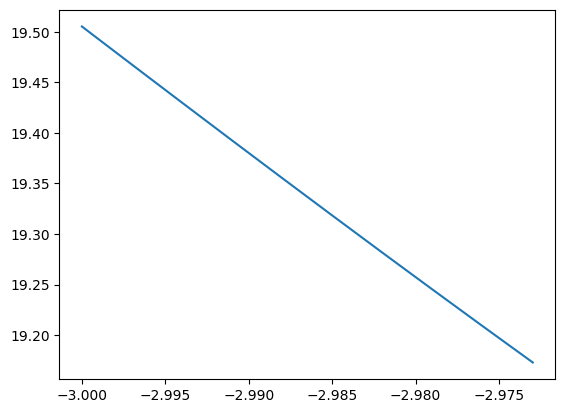

In [100]:
plt.plot(lri,lossi)